In [ ]:
Prodigy Intership

In [ ]:
DATA SCIENCE - TASK 4

In [2]:
import pandas as pd
import nltk
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
file_path = r"C:\Users\janani\OneDrive\Documents\archive\twitter_validation.csv"
column_names = ['id', 'game', 'sentiment', 'text']
data = pd.read_csv(file_path, names=column_names)
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['id', 'game', 'sentiment', 'text'], dtype='object')



Sentiment distribution:
computed_sentiment
Positive    470
Negative    324
Neutral     206
Name: count, dtype: int64


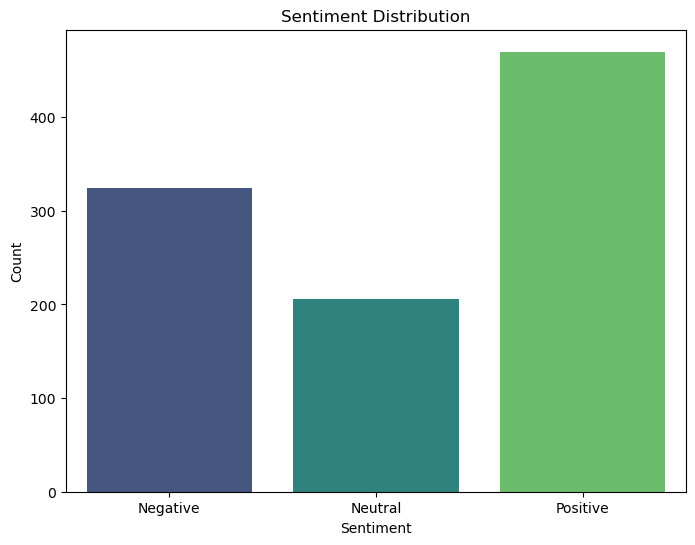

C:\Users\janani\AppData\Local\Temp\ipykernel_15816\3427029368.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data, x='polarity', bins=30, kde=True, palette='viridis')
C:\Users\janani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


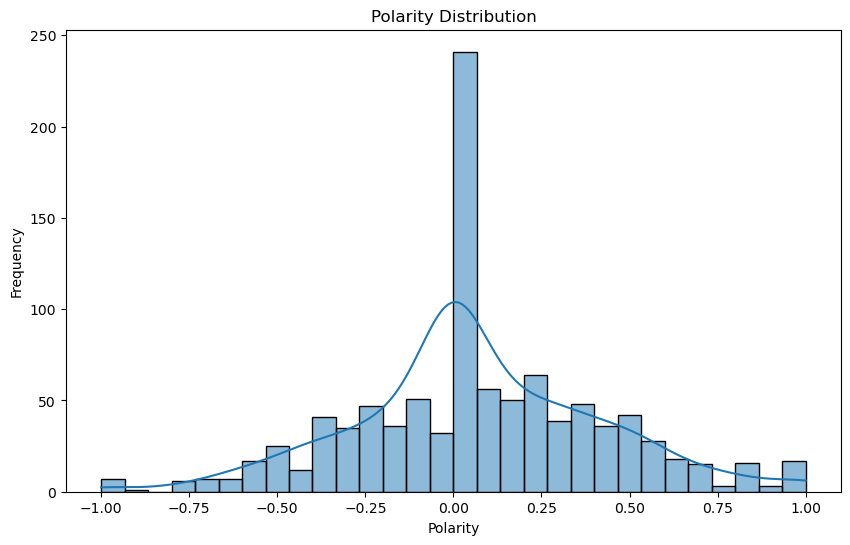

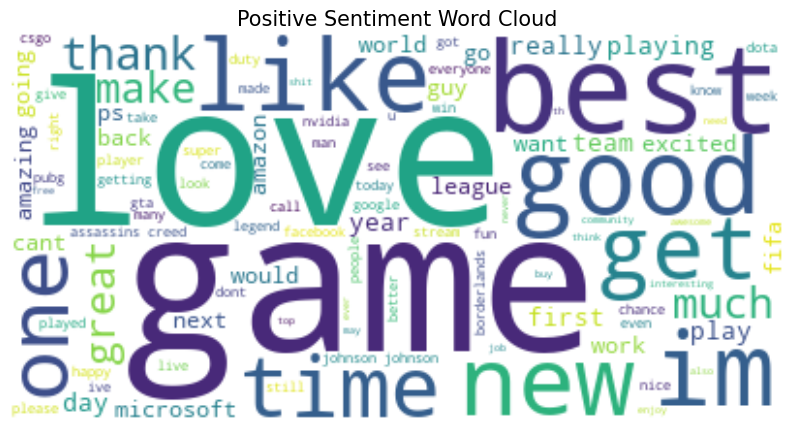

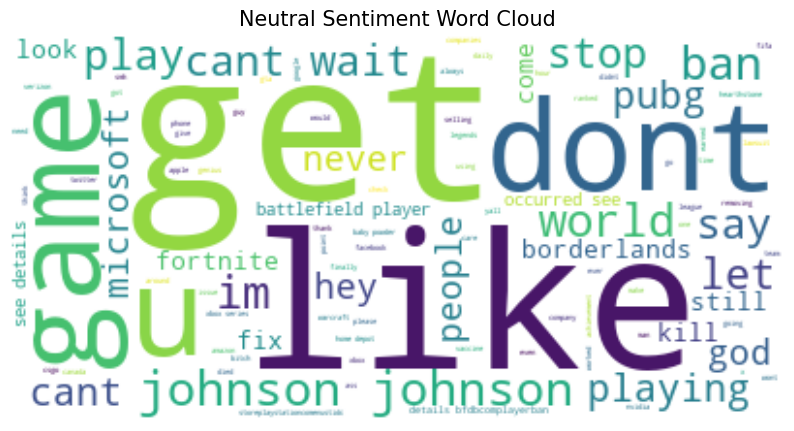

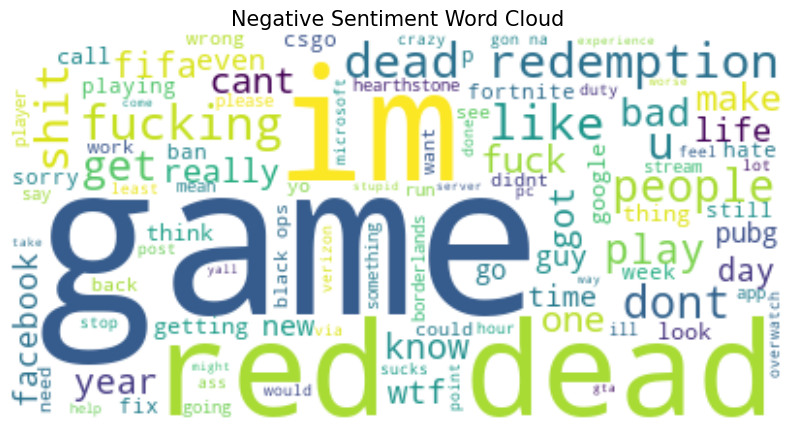

In [7]:
def clean_text(text):
    if isinstance(text, float):  # Handle NaN values
        return ""
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    return ' '.join(text)

data['cleaned_text'] = data['text'].apply(clean_text)

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['computed_sentiment'] = data['cleaned_text'].apply(get_sentiment)

print("\nSentiment distribution:")
print(data['computed_sentiment'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='computed_sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity'] = data['cleaned_text'].apply(get_polarity)

plt.figure(figsize=(10, 6))
sns.histplot(data, x='polarity', bins=30, kde=True, palette='viridis')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

stop_words = set(stopwords.words('english'))

def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

positive_text = ' '.join(data[data['computed_sentiment'] == 'Positive']['cleaned_text'])
neutral_text = ' '.join(data[data['computed_sentiment'] == 'Neutral']['cleaned_text'])
negative_text = ' '.join(data[data['computed_sentiment'] == 'Negative']['cleaned_text'])

generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud')
generate_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')
generate_wordcloud(negative_text, 'Negative Sentiment Word Cloud')